In [91]:
from math import ceil, log
from time import time
from typing import Callable
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')

# Método Newton-Raphson

In [92]:
def newton_raphson(fn: Callable, x0: float, error: float = 0.000001, max_iter:int = 20, iter: int = 1):
    if max_iter == iter or fn(x0) == 0: 
        return (x0, iter)

    df = lambda x, delta: (fn(x + delta) - fn(x - delta)) / (2 * delta)

    df_x0 = df(x0, error)

    if df_x0 == 0:
        raise Exception(f'Root cannot be found. Null derivate at x0 = {x0}')
    
    delta = fn(x0) / df_x0

    x = x0 - delta

    if abs(fn(x)) <= error or abs(delta) < error:
        return (x, iter)

    return newton_raphson(fn, x, error, iter = iter + 1)

In [93]:
def plot_method(fn: Callable, x0: float, error: float = 0.000001):
    start = time()
    r, iter = newton_raphson(fn, x0, error)
    end = time()

    elapsed = (end - start) * 1000

    x = np.linspace(min(x0, r) - 1, max(x0, r) + 1, 100)
    y = fn(x)
    yr = fn(r)
    plt.plot(x, y)
    plt.scatter(r, yr, color = "black")
    plt.text(r, yr + 1, f'Found f({r:.2f}) = 0 in {elapsed:.2f}ms with iter = {iter}')
    plt.show()

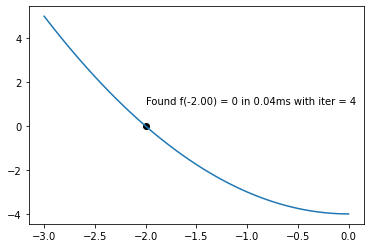

In [94]:
plot_method(lambda x: x ** 2 - 4, -1)

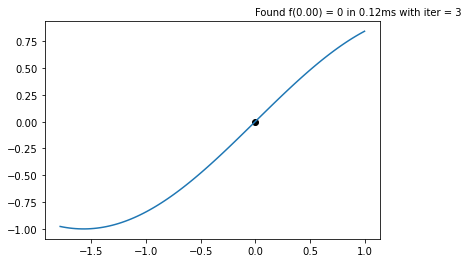

In [95]:
plot_method(lambda x: np.sin(x), -np.pi / 4)

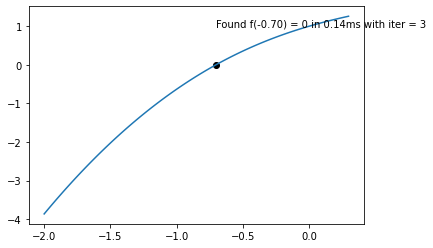

In [96]:
plot_method(lambda x: np.exp(x) - x**2, -1)

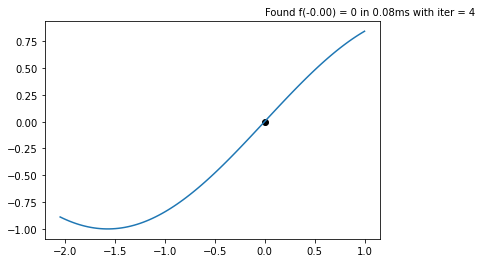

In [97]:
plot_method(lambda x: np.sin(x), -np.pi / 3)

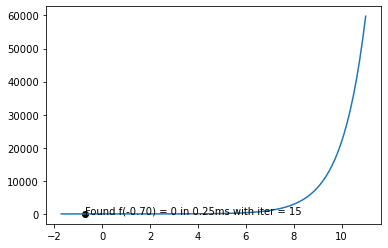

In [98]:
plot_method(lambda x: np.exp(x) - x**2, 10)